In [ ]:
Milestone One

content
The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

sex: 1 for female and 2 for male.
age: of the patient.
classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
pneumonia: whether the patient already have air sacs inflammation or not.
pregnancy: whether the patient is pregnant or not.
diabetes: whether the patient has diabetes or not.
copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
asthma: whether the patient has asthma or not.
inmsupr: whether the patient is immunosuppressed or not.
hypertension: whether the patient has hypertension or not.
cardiovascular: whether the patient has heart or blood vessels related disease.
renal chronic: whether the patient has chronic renal disease or not.
other disease: whether the patient has other disease or not.
obesity: whether the patient is obese or not.
tobacco: whether the patient is a tobacco user.
usmr: Indicates whether the patient treated medical units of the first, second or third level.
medical unit: type of institution of the National Health System that provided the care.
intubed: whether the patient was connected to the ventilator.
icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
date died: If the patient died indicate the date of death, and 9999-99-99 otherwise.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
df = pd.read_csv("Covid Data.csv")

In [49]:
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

(None,
    USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
 0      2             1    1             1  03/05/2020       97          1   
 1      2             1    2             1  03/06/2020       97          1   
 2      2             1    2             2  09/06/2020        1          2   
 3      2             1    1             1  12/06/2020       97          2   
 4      2             1    2             1  21/06/2020       97          2   
 
    AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
 0   65         2         2  ...       2        2             1              2   
 1   72        97         2  ...       2        2             1              2   
 2   55        97         1  ...       2        2             2              2   
 3   53         2         2  ...       2        2             2              2   
 4   68        97         1  ...       2        2             1              2   
 
    CARDIOVASCULAR  OBESITY  

Initial Observations:

1-The dataset has 1,048,576 entries and 21 columns.
2-Most columns are integer type, except for DATE_DIED, which is an object (a string representing dates).
3-The dataset contains several boolean-like columns where 1 means "Yes," 2 means "No," and 97 or 99 indicate missing values.
4-CLASIFFICATION_FINAL represents the Covid-19 diagnosis, where values 1-3 indicate positive cases, 4 no evidence for covid.
5-Some columns like INTUBED, ICU, and PREGNANT contain 97 as missing values.
6-DATE_DIED should be converted into a proper date format, and patients with "9999-99-99" should be considered as alive.

In [133]:

# Replace '97' and '99' with NaN (missing values)
columns_to_replace = df.columns.difference(["AGE", "DATE_DIED"])
df[columns_to_replace] = df[columns_to_replace].replace({97: np.nan, 99: np.nan, 98: np.nan})

# Convert DATE_DIED into datetime format, treating "9999-99-99" as NaT (Not a Time)
df['DATE_DIED'] = pd.to_datetime(df['DATE_DIED'], errors='coerce')

# Add a new binary column 'DIED' (1 if the patient died, 2 otherwise)
df['DIED'] = df['DATE_DIED'].notna().astype(int)* 1 + 1

# Check missing values and basic statistics again
missing_values = df.isnull().sum()
summary_stats =df['AGE'].describe()



In [97]:
missing_values

USMER                         0
MEDICAL_UNIT                  0
SEX                           0
PATIENT_TYPE                  0
DATE_DIED               1018083
INTUBED                  855869
PNEUMONIA                 16003
AGE                           0
PREGNANT                 527265
DIABETES                   3338
COPD                       3003
ASTHMA                     2979
INMSUPR                    3404
HIPERTENSION               3104
OTHER_DISEASE              5045
CARDIOVASCULAR             3076
OBESITY                    3032
RENAL_CHRONIC              3006
TOBACCO                    3220
CLASIFFICATION_FINAL          0
ICU                      856032
DIED                          0
dtype: int64

Key Findings:
Missing Values
1- ICU      856032 out of 1,048,576 
2- INTUBED  855869

In [13]:
summary_stats

count    1.048354e+06
mean     4.178230e+01
std      1.688961e+01
min      0.000000e+00
25%      3.000000e+01
50%      4.000000e+01
75%      5.300000e+01
max      1.210000e+02
Name: AGE, dtype: float64

Visualization

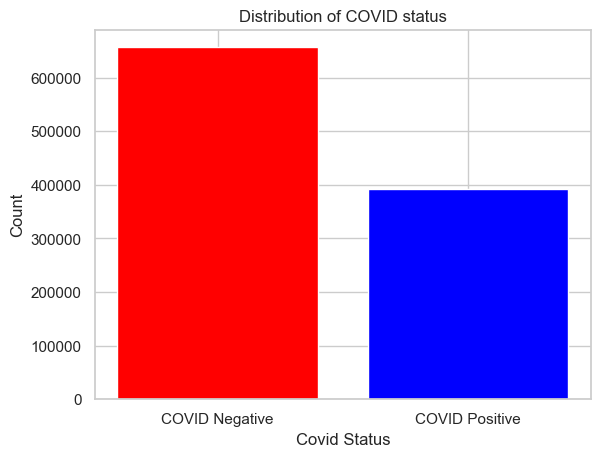

COVID_status
COVID Negative    656596
COVID Positive    391979
Name: count, dtype: int64

In [135]:
# classifications
# Define COVID status
df['COVID_status'] = df['CLASIFFICATION_FINAL'].apply(lambda x: 'COVID Positive' if x <= 3 else 'COVID Negative')

# Count occurrences

class_counts = df['COVID_status'].value_counts()

# Create bar plot
plt.bar(class_counts.index, class_counts.values, color=['red', 'blue'])
plt.xlabel('Covid Status')
plt.ylabel('Count')
plt.title('Distribution of COVID status')
plt.show()

class_counts

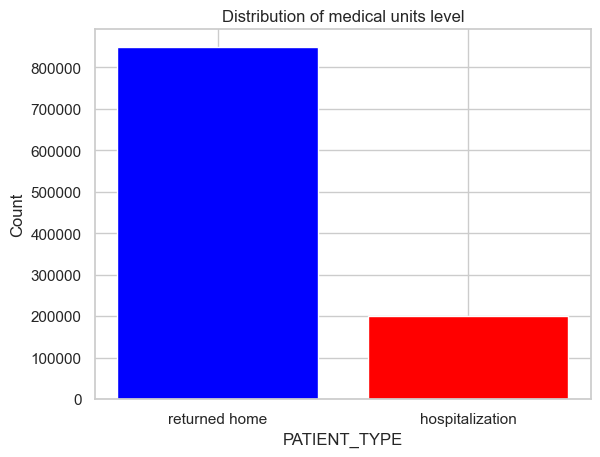

PATIENT_TYPE
1    848544
2    200031
Name: count, dtype: int64

In [63]:
#patient type

# Count occurrences
labels = ['returned home', 'hospitalization']
PATIENT_TYPE_counts = df['PATIENT_TYPE'].value_counts().sort_index()

# Create bar plot
plt.bar(labels, PATIENT_TYPE_counts, color=[ 'blue', 'red'])
plt.xlabel('PATIENT_TYPE')
plt.ylabel('Count')
plt.title('Distribution of medical units level')
plt.show()

PATIENT_TYPE_counts

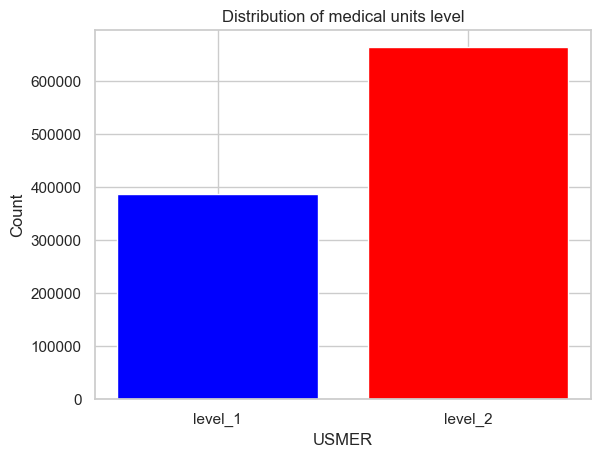

USMER
1    385672
2    662903
Name: count, dtype: int64

In [64]:
#USMER

# Count occurrences
labels = ['level_1', 'level_2']
USMER_counts = df['USMER'].value_counts().sort_index()

# Create bar plot
plt.bar(labels, USMER_counts, color=[ 'blue', 'red'])
plt.xlabel('USMER')
plt.ylabel('Count')
plt.title('Distribution of medical units level')
plt.show()

USMER_counts

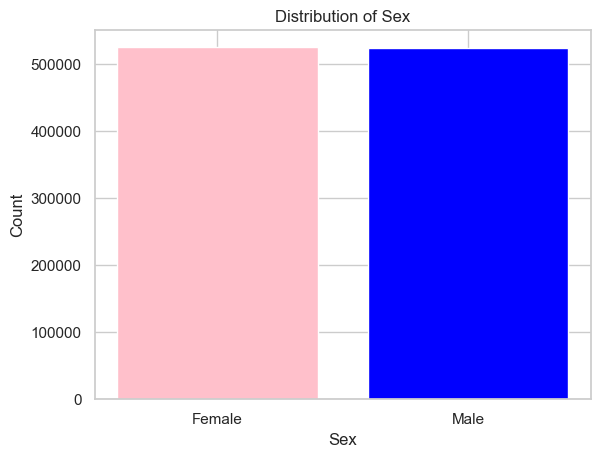

SEX
1    525064
2    523511
Name: count, dtype: int64

In [65]:
#sex

# Count occurrences
labels = ['Female', 'Male']
sex_counts = df['SEX'].value_counts().sort_index()

# Create bar plot
plt.bar(labels, sex_counts, color=['pink', 'blue'])
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

sex_counts

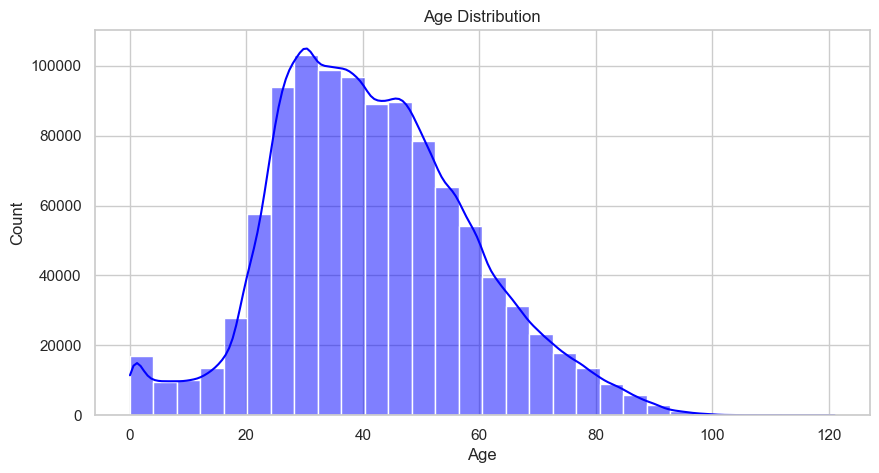

In [66]:
#Age
# Set plot style
sns.set_theme(style="whitegrid")

# Plot Age Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['AGE'], bins=30, kde=True, color="blue")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [67]:
PNEUMONIA_counts = df['PNEUMONIA'].value_counts().sort_index()
PNEUMONIA_counts

PNEUMONIA
1.0    140038
2.0    892534
Name: count, dtype: int64

In [68]:
PREGNANT_counts = df['PREGNANT'].value_counts().sort_index()
PREGNANT_counts

PREGNANT
1.0      8131
2.0    513179
Name: count, dtype: int64

In [69]:
DIABETES_counts = df['DIABETES'].value_counts().sort_index()
DIABETES_counts

DIABETES
1.0    124989
2.0    920248
Name: count, dtype: int64

In [70]:
COPD_counts = df['COPD'].value_counts().sort_index()
COPD_counts

COPD
1.0      15062
2.0    1030510
Name: count, dtype: int64

In [71]:
ASTHMA_counts = df['ASTHMA'].value_counts().sort_index()
ASTHMA_counts

ASTHMA
1.0      31572
2.0    1014024
Name: count, dtype: int64

In [72]:
INMSUPR_counts = df['INMSUPR'].value_counts().sort_index()
INMSUPR_counts

INMSUPR
1.0      14170
2.0    1031001
Name: count, dtype: int64

In [73]:
HIPERTENSION_counts = df['HIPERTENSION'].value_counts().sort_index()
HIPERTENSION_counts

HIPERTENSION
1.0    162729
2.0    882742
Name: count, dtype: int64

In [75]:
OTHER_DISEASE_counts = df['OTHER_DISEASE'].value_counts().sort_index()
OTHER_DISEASE_counts

OTHER_DISEASE
1.0      28040
2.0    1015490
Name: count, dtype: int64

In [77]:
CARDIOVASCULAR_counts = df['CARDIOVASCULAR'].value_counts().sort_index()
CARDIOVASCULAR_counts

CARDIOVASCULAR
1.0      20769
2.0    1024730
Name: count, dtype: int64

In [78]:
OBESITY_counts = df['OBESITY'].value_counts().sort_index()
OBESITY_counts

OBESITY
1.0    159816
2.0    885727
Name: count, dtype: int64

In [79]:
RENAL_CHRONIC_counts = df['RENAL_CHRONIC'].value_counts().sort_index()
RENAL_CHRONIC_counts

RENAL_CHRONIC
1.0      18904
2.0    1026665
Name: count, dtype: int64

In [80]:
TOBACCO_counts = df['TOBACCO'].value_counts().sort_index()
TOBACCO_counts

TOBACCO
1.0     84376
2.0    960979
Name: count, dtype: int64

In [83]:
ICU_counts = df['ICU'].value_counts().sort_index()
ICU_counts

ICU
1.0     16858
2.0    175685
Name: count, dtype: int64

In [98]:
Died_counts = df['DIED'].value_counts().sort_index()
Died_counts

DIED
1    1018083
2      30492
Name: count, dtype: int64

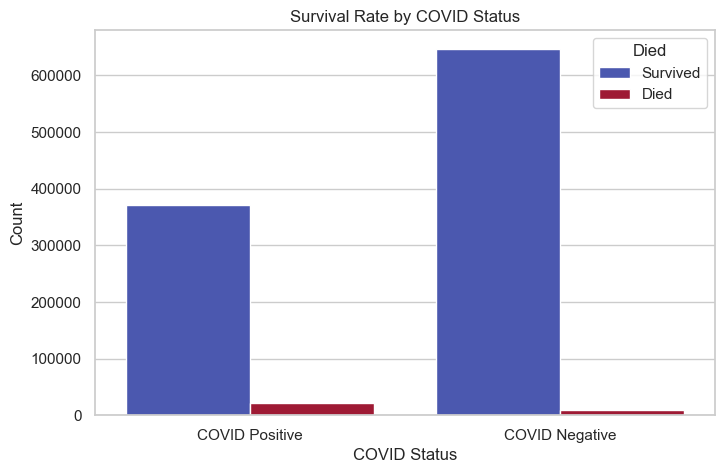

In [101]:
# Survival Rate based on COVID-19 status
plt.figure(figsize=(8, 5))
sns.countplot(x='COVID_status', hue='DIED', data=df, palette='coolwarm')
plt.title('Survival Rate by COVID Status')
plt.xlabel('COVID Status')
plt.ylabel('Count')
plt.legend(title='Died', labels=['Survived', 'Died'])
plt.show()

In [136]:


# Replace "Positive" with 1 and "Negative" with 2
df["COVID_status"] = df["COVID_status"].replace({"COVID Positive": 1, "COVID Negative": 2})

C:\Users\mahmo\AppData\Local\Temp\ipykernel_24180\1021075737.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["COVID_status"] = df["COVID_status"].replace({"COVID Positive": 1, "COVID Negative": 2})


In [137]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU', 'DIED',
       'COVID_status'],
      dtype='object')

In [138]:
df.COVID_status

0          1
1          2
2          1
3          2
4          1
          ..
1048570    2
1048571    2
1048572    2
1048573    2
1048574    2
Name: COVID_status, Length: 1048575, dtype: int64

In [139]:
COVID_status_counts = df['COVID_status'].value_counts().sort_index()
COVID_status_counts

COVID_status
1    391979
2    656596
Name: count, dtype: int64

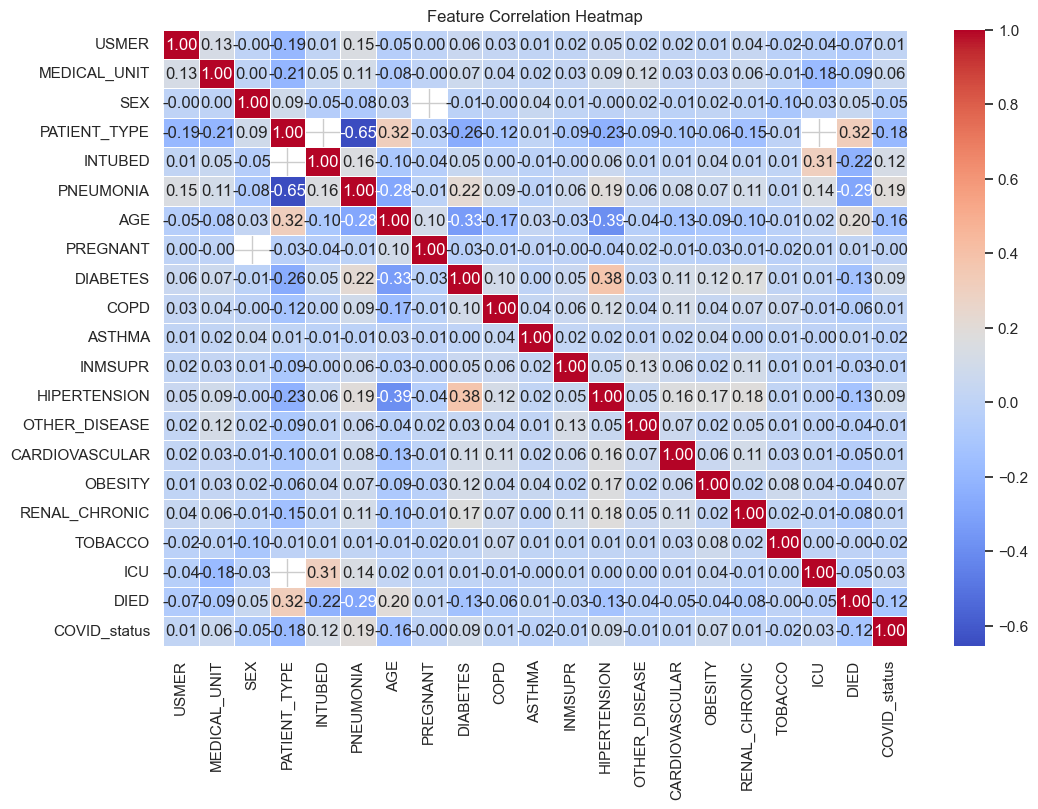

In [131]:
# Exclude specified columns from correlation calculation
columns_to_exclude = ["CLASIFFICATION_FINAL", "DATE_DIED"]
df_filtered = df.drop(columns=columns_to_exclude, errors="ignore")

# Generate correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_filtered.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Exclude specified columns
columns_to_exclude = ["CLASIFFICATION_FINAL", "DATE_DIED"]
df_filtered = df.drop(columns=columns_to_exclude, errors="ignore")
 # Select only numeric columns
numeric_df = df_filtered.select_dtypes(include=["number"])


COVID_status    1.0
Name: COVID_status, dtype: float64

In [145]:
numeric_df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'INTUBED', 'PNEUMONIA',
       'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'ICU', 'DIED', 'COVID_status'],
      dtype='object')

In [147]:
numeric_df.head(5)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,ICU,DIED,COVID_status
0,2,1,1,1,NaN,1.0,65,2.0,2.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,2,1
1,2,1,2,1,NaN,1.0,72,NaN,2.0,2.0,...,2.0,1.0,2.0,2.0,1.0,1.0,2.0,NaN,2,2
2,2,1,2,2,1.0,2.0,55,NaN,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2,1
3,2,1,1,1,NaN,2.0,53,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,2,2
4,2,1,2,1,NaN,2.0,68,NaN,1.0,2.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,NaN,1,1


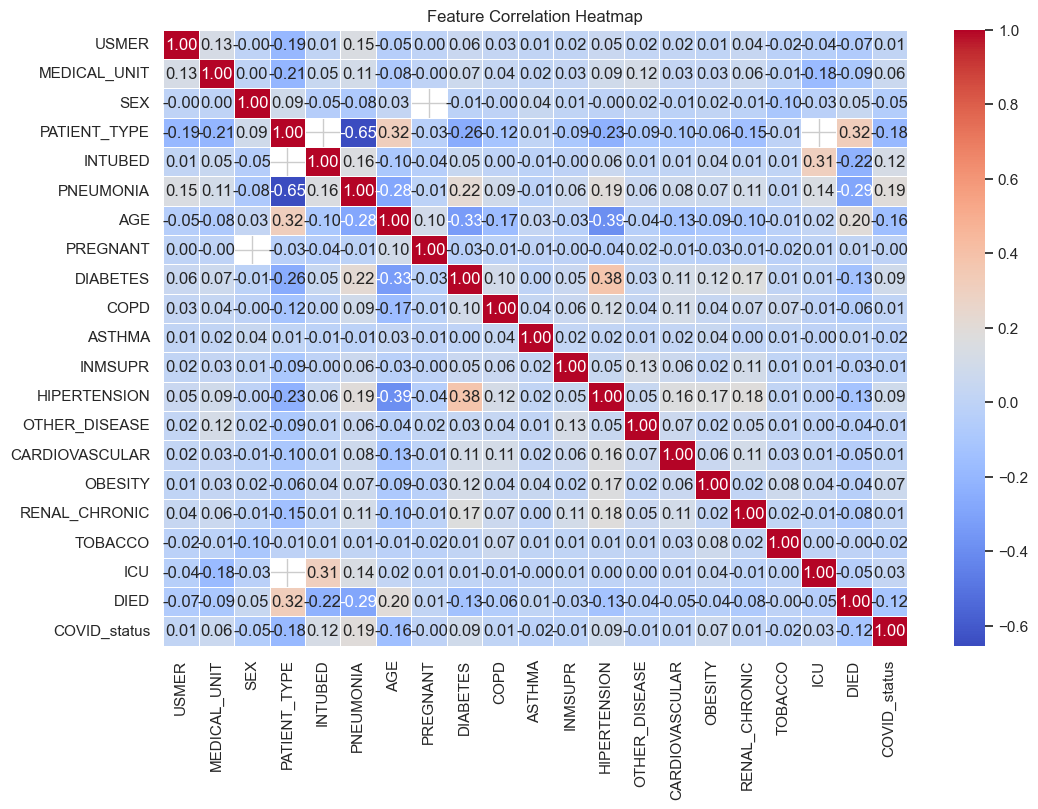

In [143]:
# Generate correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

In [144]:
# Compute correlation with COVID_STATUS
correlation_with_covid = numeric_df.corr()["COVID_status"].dropna()

 # Identify strong correlations (absolute value > 0.2 for significance)
strong_correlations = correlation_with_covid[abs(correlation_with_covid) > 0.2].sort_values(ascending=False)
strong_correlations

COVID_status    1.0
Name: COVID_status, dtype: float64